In [27]:
# gradient descent implementation
import numpy as np
import matplotlib.pyplot as plt

In [338]:
# make fake data
'''
input_data = np.arange(0.0,100.0)
true_slope = 9.65
true_intercept = 5.21
output_data = true_slope * input_data + true_intercept + 700.0*np.random.rand(len(input_data))
input_data = input_data.reshape((100,1))
'''

input_data = 2 * np.random.rand(100,1)
output_data = 4 + 3*(input_data) + np.random.rand(100,1)

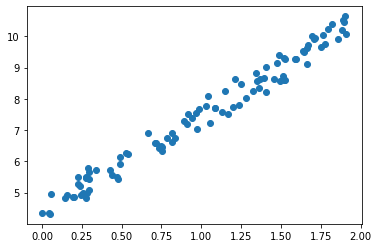

In [339]:
#plt.scatter(input_data, output_data)
plt.plot(input_data, output_data, 'o')

In [346]:
# TODO: there is something wrong with convergence with a 'normal' learning rate
# code feels clunky...
# batch gradient descent
def gradient_desc(x, y, alpha, max_iters):
    m = x.shape[0] # gives number of training samples
    _iter = 0
    error_threshold = .001
    
    # initialize theta (choosing randomly first b/c algorithm will update theta)
    t0 = 0
    t1 = 0
    
    # summation of the loss - cost function J(theta)
    for i in range(m):
        #hypothesis = t0 + t1*x[i]
        #loss = hypothesis - y[i]
        cost = (1/2*m) * sum((t0 + t1*x[i] -y[i])**2) # squared error
    
    # performing convergence
    for _iter in range(max_iters):
        
        # gradients for J(0) and J(1)
        for i in range(m):
            grad0 = (1.0/m) * sum(t0 + t1*x[i] -y[i])
            grad1 = (1.0/m) * sum((t0 + t1*x[i] -y[i])*x[i])
        
        # update thetas
        temp_t0 = t0 - (alpha * grad0)
        temp_t1 = t1 - (alpha * grad1)
        t0 = temp_t0
        t1 = temp_t1
        
        for i in range(m):
            error = (1/2*m) * sum((t0 + t1*x[i] -y[i])**2) # squared error
        
        if abs(cost-error) <= error_threshold:
            print("converged, iterations: ", _iter)
            break
        cost = error
        print ("theta1 {}, theta0 {}, cost {} iteration {}".format(t1,t0,cost, _iter))
        #print("cost %s", cost)
    return t0, t1

In [347]:
print("input_data.shape = %s output_data.shape %s" % (input_data.shape,output_data.shape))

x = input_data
y = output_data
# NOTE: works if if alpha is high like .5 - why? norm should be between 0.3-0.1
alpha = 0.01 # learning rate

# call gradient descent
theta0, theta1 = gradient_desc(x, y, alpha, max_iters=1000)
print ("theta0 = %s theta1 = %s" % (theta0, theta1))


input_data.shape = (100, 1) output_data.shape (100, 1)
theta1 0.0015144807332246023, theta0 0.0009112904738903624, cost 4149.128124431357 iteration 0
theta1 0.003028391728264865, theta0 0.001822238126001213, cost 4146.006959497384 iteration 1
theta1 0.004541733199452731, theta0 0.0027328430852999624, cost 4142.888142447173 iteration 2
theta1 0.006054505361039514, theta0 0.003643105480705504, cost 4139.771671514535 iteration 3
theta1 0.007566708427195926, theta0 0.004553025441088232, cost 4136.657544934615 iteration 4
theta1 0.009078342612012113, theta0 0.0054626030952700634, cost 4133.545760943883 iteration 5
theta1 0.010589408129497675, theta0 0.00637183857202445, cost 4130.436317780133 iteration 6
theta1 0.012099905193581709, theta0 0.0072807320000764005, cost 4127.329213682491 iteration 7
theta1 0.013609834018112832, theta0 0.0081892835081025, cost 4124.224446891402 iteration 8
theta1 0.01511919481685921, theta0 0.009097493224730923, cost 4121.122015648639 iteration 9
theta1 0.01662

theta1 0.14574345608570638, theta0 0.08769647592675303, cost 3857.051005880881 iteration 97
theta1 0.1472031090418401, theta0 0.08857477553461823, cost 3854.1495547839113 iteration 98
theta1 0.1486622128856565, theta0 0.0894527447316615, cost 3851.2502862918523 iteration 99
theta1 0.15012076782372819, theta0 0.0903303836421813, cost 3848.353198762849 iteration 100
theta1 0.15157877406255005, theta0 0.09120769239042935, cost 3845.458290556281 iteration 101
theta1 0.1530362318085393, theta0 0.09208467110061065, cost 3842.56556003276 iteration 102
theta1 0.15449314126803557, theta0 0.09296131989688346, cost 3839.675005554134 iteration 103
theta1 0.15594950264730076, theta0 0.0938376389033593, cost 3836.786625483483 iteration 104
theta1 0.15740531615251926, theta0 0.09471362824410307, cost 3833.900418185116 iteration 105
theta1 0.15886058198979786, theta0 0.09558928804313294, cost 3831.016382024574 iteration 106
theta1 0.16031530036516578, theta0 0.09646461842442043, cost 3828.134515368626

theta1 0.3351354130914906, theta0 0.20165704502778534, cost 3489.702674781582 iteration 230
theta1 0.3365238179773479, theta0 0.20249247338195842, cost 3487.077559988336 iteration 231
theta1 0.3379117005539666, theta0 0.20332758745320717, cost 3484.4544199271277 iteration 232
theta1 0.339299061017836, theta0 0.2041623873597629, cost 3481.8332531124747 iteration 233
theta1 0.34068589956537176, theta0 0.20499687321981236, cost 3479.214058060009 iteration 234
theta1 0.3420722163929155, theta0 0.20583104515149792, cost 3476.596833286483 iteration 235
theta1 0.343458011696735, theta0 0.20666490327291745, cost 3473.9815773097584 iteration 236
theta1 0.3448432856730243, theta0 0.20749844770212442, cost 3471.3682886488164 iteration 237
theta1 0.34622803851790346, theta0 0.20833167855712786, cost 3468.756965823755 iteration 238
theta1 0.34761227042741893, theta0 0.20916459595589243, cost 3466.1476073557787 iteration 239
theta1 0.3489959815975433, theta0 0.20999720001633843, cost 3463.5402117672

theta1 0.4580229002414703, theta0 0.2756006706833341, cost 3261.179449259934 iteration 320
theta1 0.4593650756228705, theta0 0.2764082819077806, cost 3258.7262401434236 iteration 321
theta1 0.4607067460862826, theta0 0.2772155893139331, cost 3256.2748764435983 iteration 322
theta1 0.46204791182165356, theta0 0.2780225930160861, cost 3253.8253567722513 iteration 323
theta1 0.46338857301885894, theta0 0.27882929312849125, cost 3251.37767974222 iteration 324
theta1 0.4647287298677028, theta0 0.279635689765357, cost 3248.9318439673843 iteration 325
theta1 0.4660683825579179, theta0 0.28044178304084905, cost 3246.4878480626667 iteration 326
theta1 0.4674075312791655, theta0 0.28124757306909, cost 3244.045690644033 iteration 327
theta1 0.46874617622103565, theta0 0.2820530599641595, cost 3241.605370328489 iteration 328
theta1 0.4700843175730469, theta0 0.2828582438400945, cost 3239.166885734082 iteration 329
theta1 0.4714219555246467, theta0 0.28366312481088884, cost 3236.730235479898 iterat

theta1 0.6385504891028149, theta0 0.3842273889998232, cost 2939.501222252229 iteration 458
theta1 0.6398247511338206, theta0 0.38499413553189915, cost 2937.2899942874333 iteration 459
theta1 0.6410985337954161, theta0 0.3857605936187229, cost 2935.080429709975 iteration 460
theta1 0.6423718372679372, theta0 0.3865267633688057, cost 2932.872527268578 iteration 461
theta1 0.6436446617316518, theta0 0.38729264489061815, cost 2930.6662857129068 iteration 462
theta1 0.6449170073667599, theta0 0.38805823829258984, cost 2928.461703793568 iteration 463
theta1 0.646188874353394, theta0 0.3888235436831097, cost 2926.258780262106 iteration 464
theta1 0.6474602628716185, theta0 0.38958856117052576, cost 2924.057513871004 iteration 465
theta1 0.6487311731014302, theta0 0.39035329086314546, cost 2921.857903373687 iteration 466
theta1 0.6500016052227584, theta0 0.39111773286923535, cost 2919.6599475245143 iteration 467
theta1 0.6512715594154644, theta0 0.39188188729702134, cost 2917.4636450787834 ite

theta1 0.819609026214872, theta0 0.49317358849054516, cost 2633.6498839900896 iteration 604
theta1 0.8208151751560705, theta0 0.4938993501434299, cost 2631.6687314636424 iteration 605
theta1 0.8220208703515774, theta0 0.4946248387693178, cost 2629.6890692512106 iteration 606
theta1 0.823226111972089, theta0 0.4953500544709199, cost 2627.71089623171 iteration 607
theta1 0.8244309001882372, theta0 0.4960749973509086, cost 2625.7342112849037 iteration 608
theta1 0.82563523517059, theta0 0.49679966751191773, cost 2623.7590132913933 iteration 609
theta1 0.8268391170896512, theta0 0.4975240650565424, cost 2621.7853011326247 iteration 610
theta1 0.8280425461158603, theta0 0.4982481900873392, cost 2619.813073690884 iteration 611
theta1 0.8292455224195927, theta0 0.4989720427068262, cost 2617.8423298492994 iteration 612
theta1 0.8304480461711599, theta0 0.49969562301748277, cost 2615.8730684918387 iteration 613
theta1 0.8316501175408091, theta0 0.5004189311217498, cost 2613.9052885033097 iterat

theta1 0.958847467760927, theta0 0.5769558794082353, cost 2409.8686507337884 iteration 722
theta1 0.9600012360708396, theta0 0.5776501226870265, cost 2408.0558367394797 iteration 723
theta1 0.9611545703403267, theta0 0.5783441047958362, cost 2406.244386427202 iteration 724
theta1 0.9623074707326714, theta0 0.5790378258329149, cost 2404.434298771132 iteration 725
theta1 0.9634599374110956, theta0 0.579731285896476, cost 2402.625572746217 iteration 726
theta1 0.9646119705387598, theta0 0.5804244850846964, cost 2400.818207328175 iteration 727
theta1 0.9657635702787631, theta0 0.5811174234957154, cost 2399.012201493496 iteration 728
theta1 0.9669147367941433, theta0 0.581810101227636, cost 2397.207554219437 iteration 729
theta1 0.9680654702478767, theta0 0.582502518378524, cost 2395.4042644840283 iteration 730
theta1 0.9692157708028784, theta0 0.5831946750464083, cost 2393.6023312660654 iteration 731
theta1 0.9703656386220021, theta0 0.5838865713292811, cost 2391.801753545115 iteration 732

theta1 1.090934985025281, theta0 0.6564353297321392, cost 2206.7621370261068 iteration 839
theta1 1.0920390628369196, theta0 0.6570996733385699, cost 2205.1021090893582 iteration 840
theta1 1.0931427253013877, theta0 0.6577637670230888, cost 2203.4433299019447 iteration 841
theta1 1.0942459725749358, theta0 0.658427610879715, cost 2201.7857985245 iteration 842
theta1 1.0953488048137565, theta0 0.6590912050024322, cost 2200.1295140183624 iteration 843
theta1 1.096451222173983, theta0 0.6597545494851889, cost 2198.474475445579 iteration 844
theta1 1.0975532248116902, theta0 0.6604176444218979, cost 2196.8206818689023 iteration 845
theta1 1.098654812882894, theta0 0.6610804899064369, cost 2195.168132351788 iteration 846
theta1 1.0997559865435518, theta0 0.6617430860326483, cost 2193.516825958397 iteration 847
theta1 1.1008567459495622, theta0 0.6624054328943392, cost 2191.8667617535953 iteration 848
theta1 1.1019570912567653, theta0 0.6630675305852811, cost 2190.2179388029513 iteration 84

theta1 1.2509462327900696, theta0 0.7527169942026358, cost 1972.6928054862717 iteration 988
theta1 1.2519901153705801, theta0 0.7533451172487798, cost 1971.2088552621929 iteration 989
theta1 1.2530336052489897, theta0 0.7539730039989605, cost 1969.7260213336967 iteration 990
theta1 1.2540767025730302, theta0 0.7546006545420708, cost 1968.2443028610571 iteration 991
theta1 1.255119407490378, theta0 0.7552280689669705, cost 1966.763699005175 iteration 992
theta1 1.2561617201486543, theta0 0.7558552473624857, cost 1965.284208927585 iteration 993
theta1 1.2572036406954243, theta0 0.7564821898174092, cost 1963.805831790452 iteration 994
theta1 1.2582451692781982, theta0 0.7571088964205004, cost 1962.3285667565706 iteration 995
theta1 1.25928630604443, theta0 0.7577353672604852, cost 1960.8524129893663 iteration 996
theta1 1.2603270511415188, theta0 0.7583616024260563, cost 1959.3773696528929 iteration 997
theta1 1.2613674047168082, theta0 0.7589876020058729, cost 1957.9034359118325 iteratio

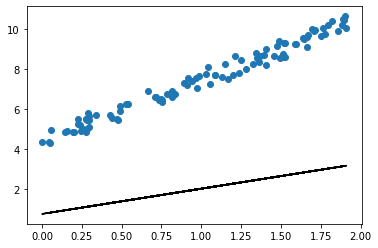

In [348]:
for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x
plt.plot(x, y, 'o')
plt.plot(x, y_predict, 'k-')

In [207]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0 iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002 iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001 iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613 iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832 iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282 iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438 iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738 iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156 iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794 iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109 iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315 iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937 iteration 12
m 1.8898457

m 2.000000000000006, b 2.9999999999999774, cost 9.860761315262648e-29 iteration 1174
m 2.000000000000006, b 2.999999999999978, cost 9.2770042453991e-29 iteration 1175
m 2.0000000000000053, b 2.9999999999999782, cost 9.797652442844967e-29 iteration 1176
m 2.000000000000006, b 2.999999999999979, cost 8.519697776386927e-29 iteration 1177
m 2.0000000000000053, b 2.9999999999999796, cost 8.204153414298523e-29 iteration 1178
m 2.0000000000000058, b 2.9999999999999805, cost 7.730836871165916e-29 iteration 1179
m 2.000000000000005, b 2.999999999999981, cost 7.210188673720048e-29 iteration 1180
m 2.0000000000000058, b 2.999999999999982, cost 6.752649348691862e-29 iteration 1181
m 2.0000000000000044, b 2.999999999999982, cost 6.941975965944904e-29 iteration 1182
m 2.0000000000000053, b 2.9999999999999827, cost 6.437104986603457e-29 iteration 1183
m 2.0000000000000044, b 2.999999999999983, cost 5.99534287967969e-29 iteration 1184
m 2.0000000000000053, b 2.9999999999999836, cost 4.8751603942658533

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2000
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2001
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2002
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2003
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2004
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2005
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2006
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2007
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2008
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2009
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2010
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2227
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2228
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2229
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2230
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2231
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2232
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2233
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2234
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2235
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 2236
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 2237
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 3172
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 3173
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 3174
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 3175
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 3176
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 3177
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 3178
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 3179
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 3180
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 3181
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 3182
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4154
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4155
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4156
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4157
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4158
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4159
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4160
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4161
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4162
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4163
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4164
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4671
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4672
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4673
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4674
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4675
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4676
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4677
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4678
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4679
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 4680
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 4681
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5622
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5623
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5624
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5625
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5626
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5627
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5628
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5629
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5630
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5631
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5632
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5910
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5911
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5912
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5913
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5914
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5915
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5916
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5917
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5918
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 5919
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 5920
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 6670
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 6671
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 6672
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 6673
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 6674
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 6675
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 6676
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 6677
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 6678
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 6679
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 6680
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 7533
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 7534
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 7535
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 7536
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 7537
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 7538
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 7539
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 7540
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 7541
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 7542
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 7543
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8210
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8211
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8212
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8213
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8214
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8215
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8216
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8217
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8218
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8219
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8220
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8572
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8573
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8574
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8575
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8576
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8577
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8578
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8579
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8580
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 8581
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 8582
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767

m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9163
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9164
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9165
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9166
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9167
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9168
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9169
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9170
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9171
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9172
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9173
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767

m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9726
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9727
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9728
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9729
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9730
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9731
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9732
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9733
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9734
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767873153e-29 iteration 9735
m 2.000000000000001, b 2.9999999999999947, cost 1.0255191767873153e-29 iteration 9736
m 2.000000000000002, b 2.999999999999995, cost 1.0255191767